In [5]:
import xarray as xr
from glob import glob
import numpy as np

In [2]:
fn = glob(r'Y:/Teris/ASAP/expt_sessions/kms058*/processed/xr_session.nc')
ds = xr.open_dataset(fn[0])

In [3]:
ds

<xarray.Dataset>
Dimensions:                  (time: 48850)
Coordinates:
  * time                     (time) float64 6.638e+03 6.688e+03 ... 2.449e+06
Data variables: (12/26)
    trial_nb                 (time) int16 ...
    uid                      (time) object ...
    trigger                  (time) object ...
    valid                    (time) bool ...
    break_after_abort        (time) bool ...
    US_end_timer             (time) bool ...
    ...                       ...
    analog_1_filt            (time) float64 ...
    analog_2_filt            (time) float64 ...
    analog_1_df_over_f       (time) float64 ...
    rel_time_hold_for_water  (time) float64 ...
    rel_time_first_bar_off   (time) float64 ...
    rel_time_spout           (time) float64 ...

In [42]:
ds = ds.dropna(dim='time', subset=['rel_time_hold_for_water'])
total_trial = ds.trial_nb.data[-1] - ds.trial_nb.data[0]-1
total_trial

165

In [45]:
x = ds['rel_time_hold_for_water'].data
x.reshape((total_trial,-1))

ValueError: cannot reshape array of size 20965 into shape (165,newaxis)

In [59]:
x.reshape(106,-1)

ValueError: cannot reshape array of size 20965 into shape (106,newaxis)

In [54]:
np.arange(-2000,4050,50).shape

(121,)

In [32]:
c, t = [arr.flatten() for arr in np.meshgrid(range(10), range(1234, 1234+10))]

da = xr.DataArray( 
    np.random.randn(100), 
    dims=('ct'), 
    coords={ 
        'c': ('ct', c), 
    }
)

In [79]:
x.shape[0]/121

173.26446280991735

In [19]:
da.set_index(ct=(np.arange(100), np.arange(100)+2)).unstack('ct')

TypeError: unhashable type: 'numpy.ndarray'

In [11]:
da.set_index(ct=)

<xarray.DataArray 'rel_time_hold_for_water' (time: 48850)>
[48850 values with dtype=float64]
Coordinates:
  * time     (time) float64 6.638e+03 6.688e+03 ... 2.449e+06 2.449e+06

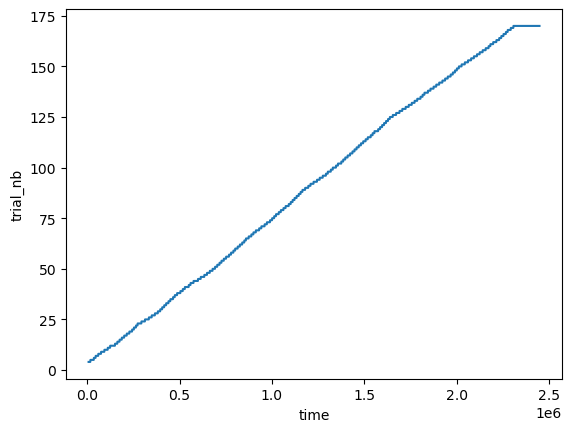

In [15]:
ds['trial_nb'].plot()